In [1]:


import pandas as pd
df = pd.read_csv('/review2wheeler.csv')
print(df.head())


                                              review    Used it for  \
0  We all checked the bike's capacity to be 150 k...  Daily Commute   
1  Performance is very poor on this bike. The cha...     Everything   
2  I purchased this in April 2022 and the sales s...  Daily Commute   
3  If any issues come in scooty parts not availab...  Daily Commute   
4  Don't buy this vehicle unless you have a near ...  Daily Commute   

       Owned for      Ridden for  rating  Visual Appeal  Reliability  \
0    Never owned             NaN       1            3.0          4.0   
1         > 1 yr      < 5000 kms       1            3.0          1.0   
2     < 3 months      < 5000 kms       3            4.0          4.0   
3  6 months-1 yr  5000-10000 kms       1            1.0          1.0   
4  6 months-1 yr      < 5000 kms       1            3.0          4.0   

   Performance  Service Experience  Extra Features  Comfort  Maintenance cost  \
0          NaN                 NaN             NaN      4.0

In [2]:


import pandas as pd
df = pd.read_csv('/review4wheeler.csv')
print(df.head())


                                              Review  Rating  \
0  Using it for the last 1 month. It's a gentle-l...     5.0   
1  In the beginning, the car performed excellentl...     1.0   
2  Hyundai is the best performing company beating...     5.0   
3  The car offers reasonable performance in this ...     5.0   
4  Hyundai Kona - First electric car of India was...     4.0   

                                Attributes Mentioned         Model  
0  ['mileage' 'performance' 'power' 'price' 'seat...  hyundai kona  
1        ['mileage' 'performance' 'service' 'parts']  hyundai kona  
2                          ['performance' 'service']  hyundai kona  
3                                    ['performance']  hyundai kona  
4  ['looks' 'comfort' 'interior' 'price' 'insuran...  hyundai kona  


In [4]:


import pandas as pd
df = pd.read_csv('/EVIndia.csv')
print(df.head())


                     Car             Style               Range Transmission  \
0          Tata Nexon EV       Compact SUV  312 Km/Full Charge    Automatic   
1          Tata Tigor EV  Subcompact Sedan  306 Km/Full Charge    Automatic   
2      Tata Nexon EV Max       Compact SUV  437 Km/Full Charge    Automatic   
3               MG ZS EV       Compact SUV  419 Km/Full Charge    Automatic   
4  Hyundai Kona Electric       Compact SUV  452 Km/Full Charge    Automatic   

  VehicleType  Capacity BootSpace          BaseModel            TopModel  \
0    Electric  5 Seater     350 L                 XM    Dark XZ Plus LUX   
1    Electric  5 Seater     316 L                 XE   XZ Plus Dual Tone   
2    Electric  5 Seater     350 L     XZ Plus 3.3 kW  XZ Plus Lux 7.2 kW   
3    Electric  5 Seater     448 L             Excite           Exclusive   
4    Electric  5 Seater        na  Premium Dual Tone                 HSE   

     price  
0  1569500  
1  1306500  
2  1849900  
3  2393500  
4  

**Number of EV Cars in Each Price Range**

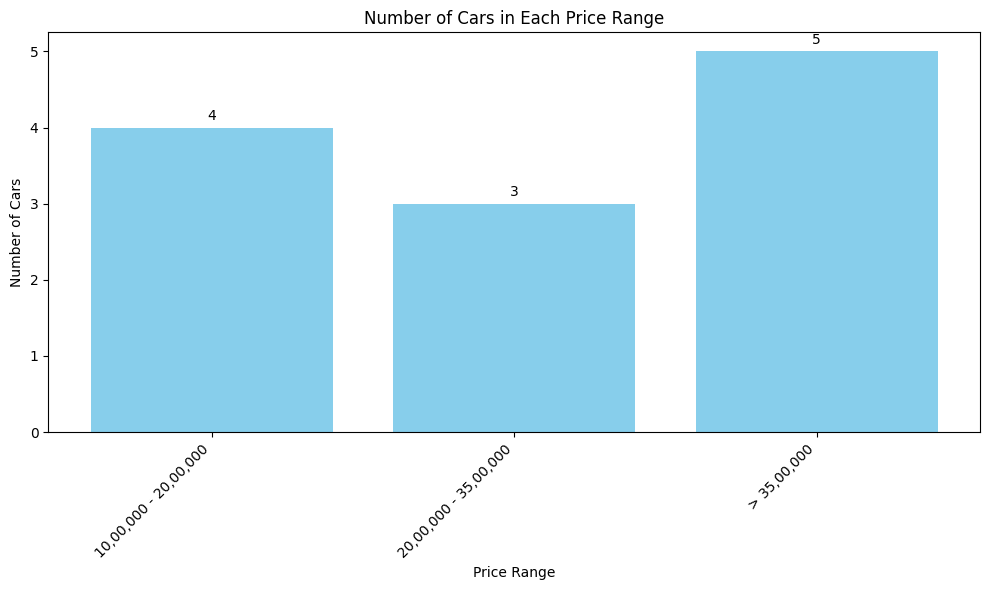

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/EVIndia.csv')

# Define the price ranges
range1_max = 1000000
range2_min = 1000000
range2_max = 2000000
range3_min = 2000000
range3_max = 3500000

# Categorize the prices into the defined ranges
def categorize_price(price):
    if price <= range1_max:
        return '≤ 10,00,000'
    elif range2_min < price <= range2_max:
        return '10,00,000 - 20,00,000'
    elif range3_min < price <= range3_max:
        return '20,00,000 - 35,00,000'
    else:
        return '> 35,00,000'

df['PriceRange'] = df['price'].apply(categorize_price)

# Count the number of cars in each price range
price_range_counts = df['PriceRange'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(10, 6))
bars = plt.bar(price_range_counts.index, price_range_counts.values, color='skyblue')

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xlabel('Price Range')
plt.ylabel('Number of Cars')
plt.title('Number of EV Cars in Each Price Range')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [6]:


import pandas as pd

df = pd.read_csv('/review4wheeler.csv')
unique_models = df['Model'].unique()
print(unique_models)


['hyundai kona' 'Kia EV6' 'Tata Nexon EV' 'MG ZS EV' 'Tata Tigor EV'
 'BYD E6']


Rating Distribution for Each Model for 2 wheelers

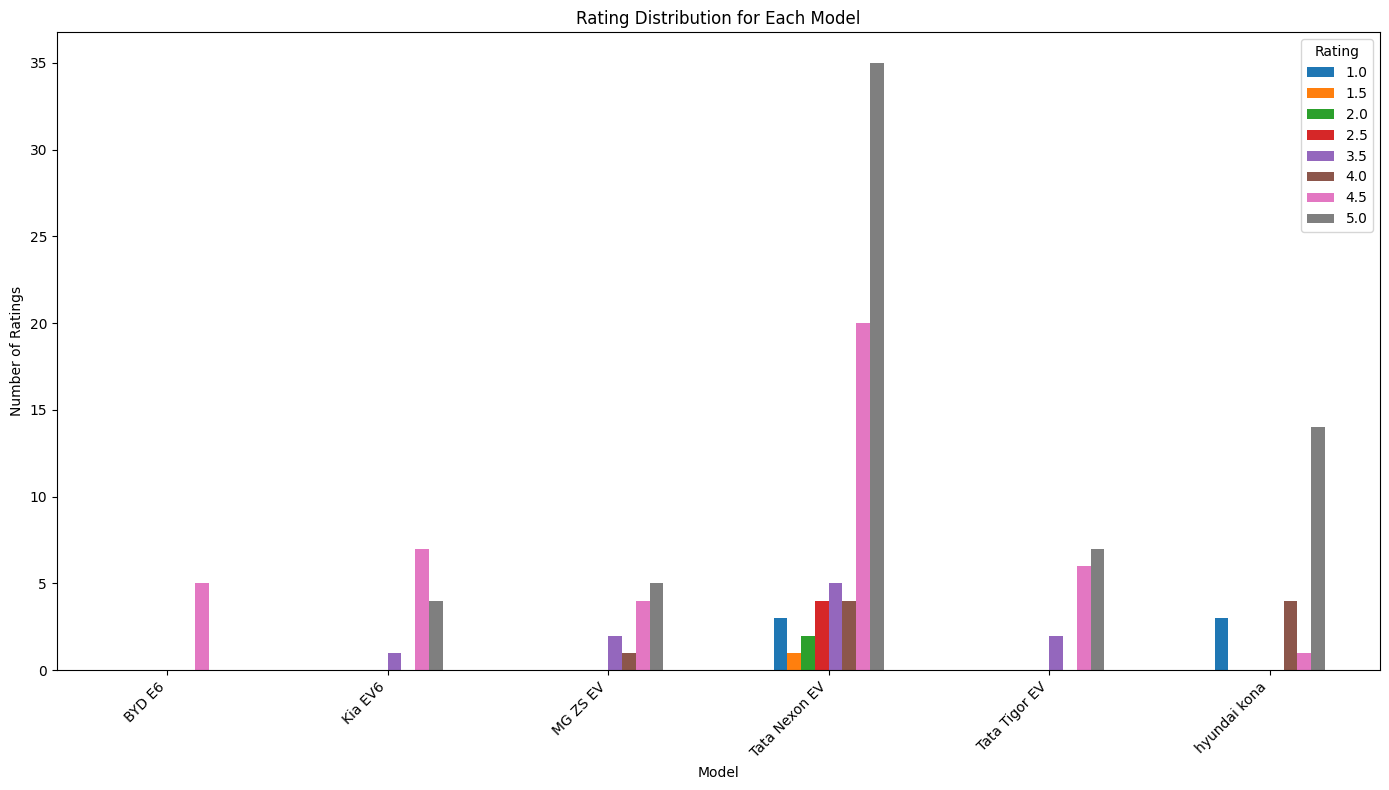

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/review4wheeler.csv')

# Group by Model and Rating, then count the number of occurrences
rating_counts = df.groupby(['Model', 'Rating']).size().unstack(fill_value=0)

# Plotting the data
fig, ax = plt.subplots(figsize=(14, 8))

# Plot a bar chart for each model
rating_counts.plot(kind='bar', ax=ax)

# Customize the plot
ax.set_title('Rating Distribution for Each Model')
ax.set_xlabel('Model')
ax.set_ylabel('Number of Ratings')
ax.legend(title='Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


Rating Distribution for Each Model for 4 wheelers

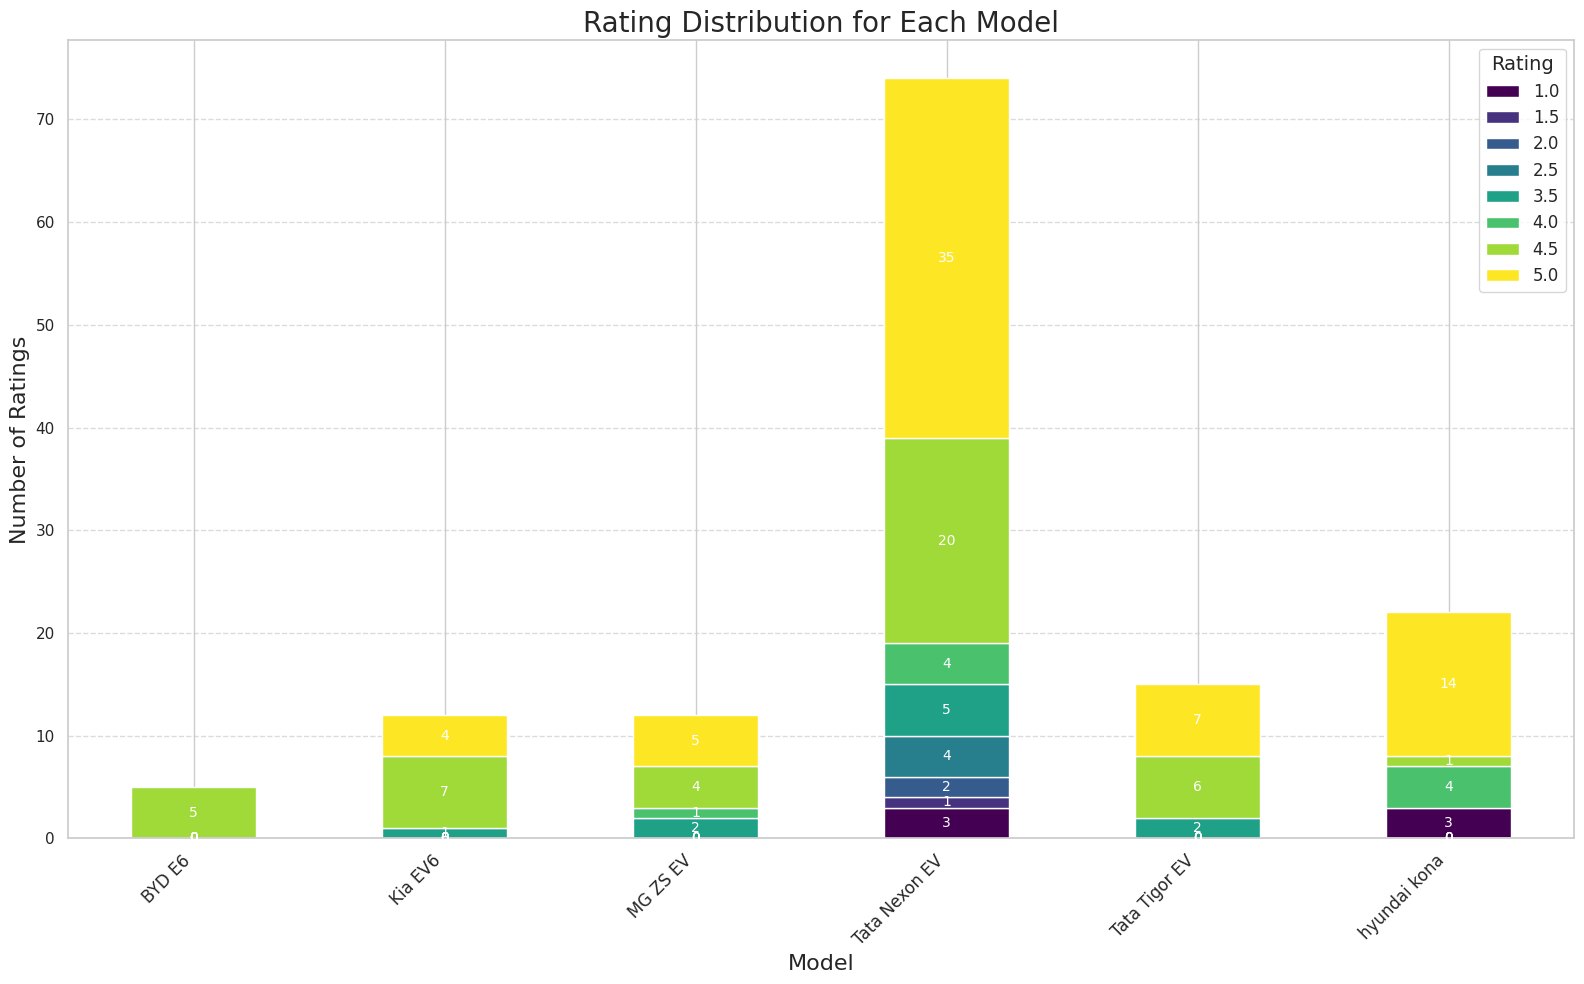

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/review4wheeler.csv')

# Group by Model and Rating, then count the number of occurrences
rating_counts = df.groupby(['Model', 'Rating']).size().unstack(fill_value=0)

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure and axes
fig, ax = plt.subplots(figsize=(16, 10))

# Plot a bar chart for each model
rating_counts.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# Customize the plot
ax.set_title('Rating Distribution for Each Model', fontsize=20)
ax.set_xlabel('Model', fontsize=16)
ax.set_ylabel('Number of Ratings', fontsize=16)
ax.legend(title='Rating', fontsize=12, title_fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add annotations
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10, color='white')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


**Rating Distribution for Each Model for 2 wheelers**

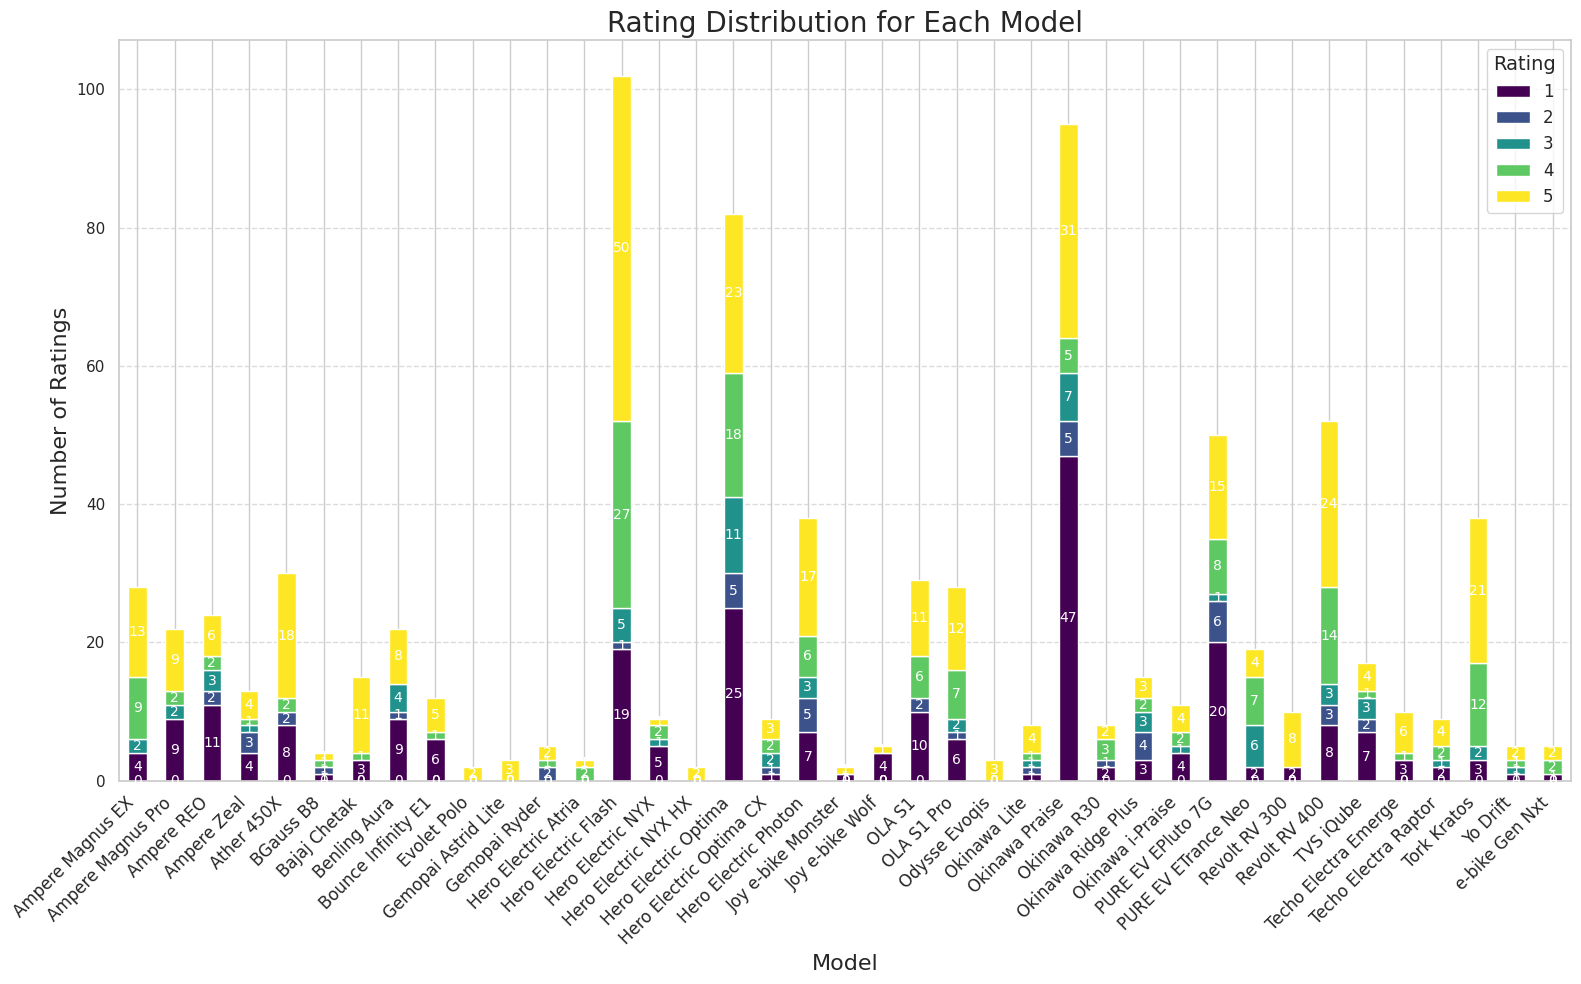

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/review2wheeler.csv')

# Group by Model and Rating, then count the number of occurrences
rating_counts = df.groupby(['Model Name', 'rating']).size().unstack(fill_value=0)

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure and axes
fig, ax = plt.subplots(figsize=(16, 10))

# Plot a bar chart for each model
rating_counts.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# Customize the plot
ax.set_title('Rating Distribution for Each Model for 2 wheelers', fontsize=20)
ax.set_xlabel('Model', fontsize=16)
ax.set_ylabel('Number of Ratings', fontsize=16)
ax.legend(title='Rating', fontsize=12, title_fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add annotations
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10, color='white')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Top 10 Most Common  Reviews

<ipython-input-12-4abd34661c59>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Attribute', data=top_attributes_df, palette='viridis', ax=ax)


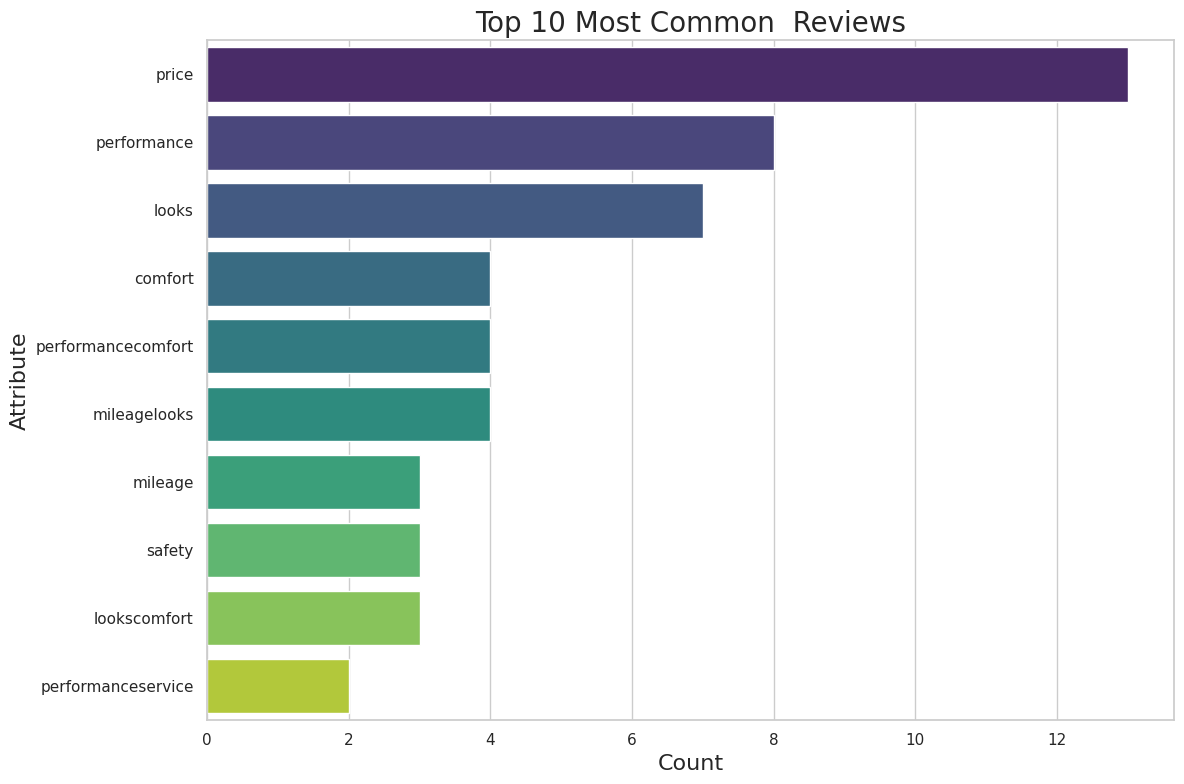

In [12]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load the dataset
df = pd.read_csv('/review4wheeler.csv')

# Parse the lists in the 'Attributes Mentioned' column
df['Attributes Mentioned'] = df['Attributes Mentioned'].apply(ast.literal_eval)

# Flatten the lists and count the occurrences of each attribute
all_attributes = [attribute for sublist in df['Attributes Mentioned'] for attribute in sublist]
attribute_counts = Counter(all_attributes)

# Convert the counter to a DataFrame for visualization
attribute_counts_df = pd.DataFrame(attribute_counts.items(), columns=['Attribute', 'Count'])

# Filter to the top 10 most common attributes for better visualization
top_attributes_df = attribute_counts_df.nlargest(10, 'Count')

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot a bar chart
sns.barplot(x='Count', y='Attribute', data=top_attributes_df, palette='viridis', ax=ax)

# Customize the plot
ax.set_title('Top 10 Most Common  Reviews', fontsize=20)
ax.set_xlabel('Count', fontsize=16)
ax.set_ylabel('Attribute', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Code for grouping the models with most occured review

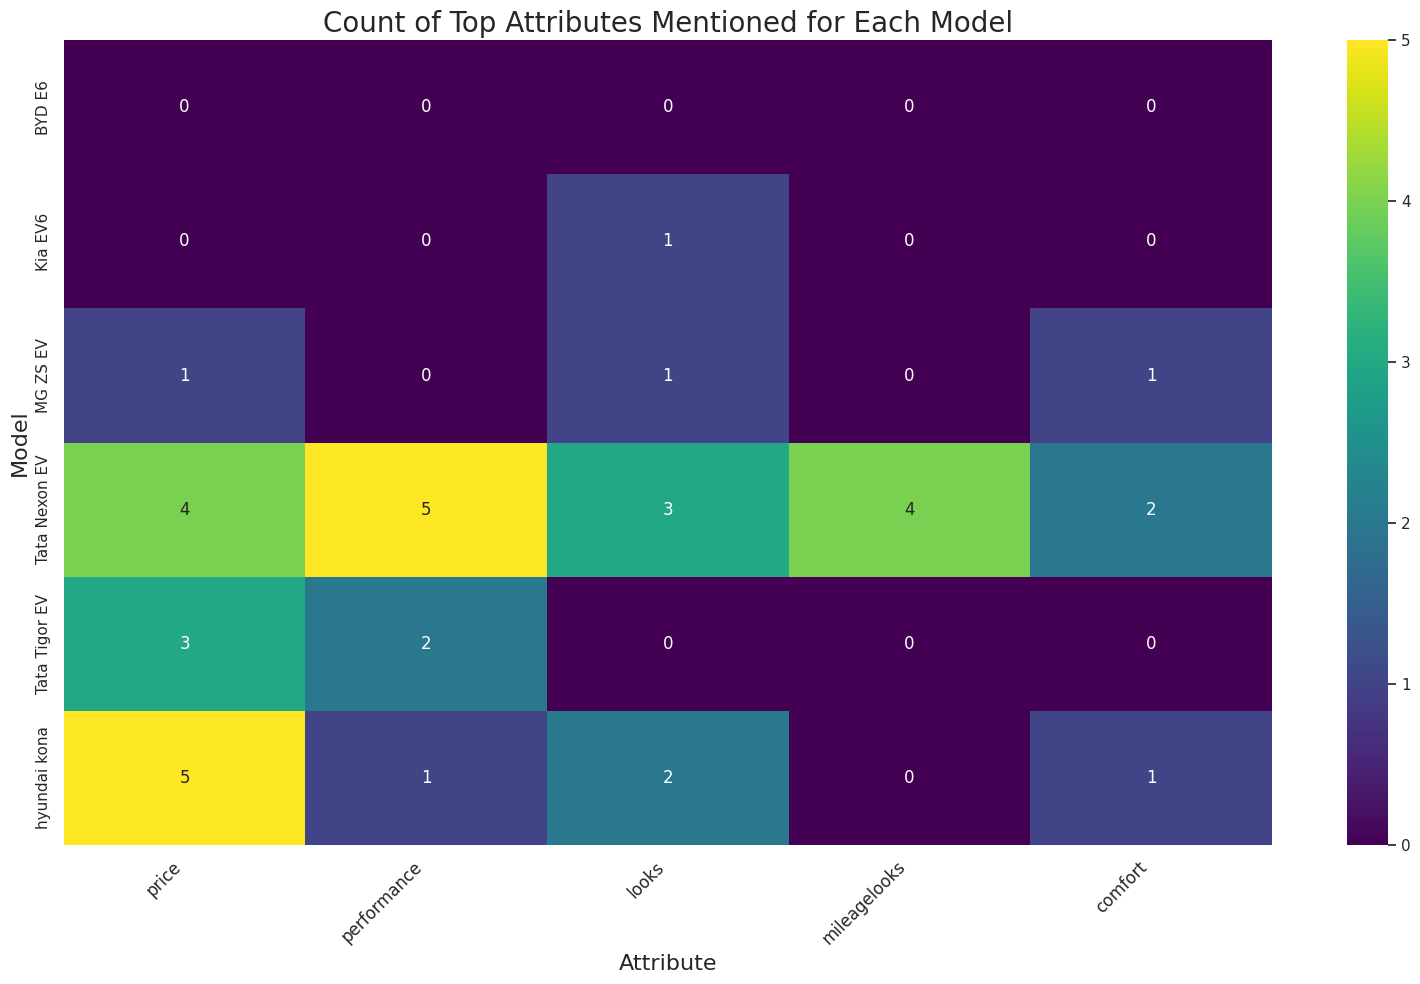

In [11]:


# Load the dataset
df = pd.read_csv('/review4wheeler.csv')

# Parse the lists in the 'Attributes Mentioned' column
df['Attributes Mentioned'] = df['Attributes Mentioned'].apply(ast.literal_eval)

# Explode the 'Attributes Mentioned' column to create a row for each attribute
df_exploded = df.explode('Attributes Mentioned')

# Group by Model and Attribute, then count the occurrences
attribute_counts = df_exploded.groupby(['Model', 'Attributes Mentioned']).size().unstack(fill_value=0)

# Select the top 5 most common attributes overall
top_attributes = df_exploded['Attributes Mentioned'].value_counts().nlargest(5).index

# Filter the attribute counts to include only the top attributes
attribute_counts_top = attribute_counts[top_attributes]

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure and axes
fig, ax = plt.subplots(figsize=(16, 10))

# Plot a heatmap
sns.heatmap(attribute_counts_top, annot=True, cmap='viridis', fmt='d', ax=ax)

# Customize the plot
ax.set_title('Count of Top Attributes Mentioned for Each Model', fontsize=20)
ax.set_xlabel('Attribute', fontsize=16)
ax.set_ylabel('Model', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
